## <font color=navy> Исследование успешности игр </font>

Заказчик - интернет-магазин, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## <font color=green> Описание данных </font>

 - Name — название игры;
 - Platform — платформа;
 - Year_of_Release — год выпуска;
 - Genre — жанр игры;
 - NA_sales — продажи в Северной Америке (миллионы долларов);
 - EU_sales — продажи в Европе (миллионы долларов);
 - JP_sales — продажи в Японии (миллионы долларов);
 - Other_sales — продажи в других странах (миллионы долларов);
 - Critic_Score — оценка критиков (максимум 100);
 - User_Score — оценка пользователей (максимум 10);
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 
 ----
ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Шаг 1. Загрузка данных. 

In [71]:
# импортируем данные
import pandas as pd
from datetime import datetime, time
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [72]:
# и сохраним исходные таблицы в переменных:
games_data = pd.read_csv('/datasets/games.csv')

Посмотрим информацию по таблице и саму таблицу:

In [73]:
games_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [74]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице представлены данные о 16 715 играх, выпущенных для разных игровых платформ, в разные года, разных жанров, различных уровней продаж в разных странах и разного рейтинга среди критиков, пользователей и ассоциации Entertainment Software Rating Board. В столбцах есть пропущенные данные и нулевые значения. В дальнейшем рассмотрим каждый столбец по отдельности.

### Шаг 2. Подготовка данных. 

Заменим названия столбцов (приведем к нижнему регистру):

In [75]:
games_data.set_axis(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
                     'other_sales', 'critic_score', 'user_score', 'rating'], axis = 'columns', inplace = True)
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим каждый столбец. 
1. Столбец 'name' содержит 2 пустых значения:

In [76]:
games_data[games_data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это 2 строки с данными об играх, выпущенных в 1993 году для платформы GEN. Удалим их

In [77]:
# Для этого сначала заполним пустующие строки значением nameless: 
games_data['name'] = games_data['name'].fillna("nameless")

In [78]:
# а затем удалим те строки, по которым произошло заполнение
games_data = games_data[games_data['name'] != 'nameless']

2. Столбец 'platform':

In [79]:
games_data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [80]:
# удалим строки с редкими значениями наименования платформ: WS, SCD, 3DO, TG16, PCFX, GG:
games_data = games_data[games_data['platform'] != 'WS']
games_data = games_data[games_data['platform'] != 'SCD']
games_data = games_data[games_data['platform'] != '3DO']
games_data = games_data[games_data['platform'] != 'TG16']
games_data = games_data[games_data['platform'] != 'PCFX']
games_data = games_data[games_data['platform'] != 'GG']
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16694 entries, 0 to 16714
Data columns (total 11 columns):
name               16694 non-null object
platform           16694 non-null object
year_of_release    16425 non-null float64
genre              16694 non-null object
na_sales           16694 non-null float64
eu_sales           16694 non-null float64
jp_sales           16694 non-null float64
other_sales        16694 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


 3. Столбец 'year_of_release' - имеет пропущенные значения. Для дальнейшего анализа важно, сколько игр выпускалось в разные годы. Заполним пропущенные значения медианой года выпуска по платформам:

In [81]:
# посмотрим по каким платформам есть пропущенные значения по столбцу года релиза. Для этого сформируем сводную таблицу:
games_data[games_data['year_of_release'].isnull()].pivot_table(index='platform', values='name', aggfunc = 'count')


,name
platform,
2600,17
3DS,8
DS,30
GB,1
GBA,11
GC,14
N64,3
PC,17
PS,7


In [82]:
# посчитаем медиану годов выпуска по платформам:
atari_year_of_release_median = games_data[games_data['platform'] == '2600']['year_of_release'].median()
threeds_year_of_release_median = games_data[games_data['platform'] == '3DS']['year_of_release'].median()
ds_year_of_release_median = games_data[games_data['platform'] == 'DS']['year_of_release'].median()
gb_year_of_release_median = games_data[games_data['platform'] == 'GB']['year_of_release'].median()
gba_year_of_release_median = games_data[games_data['platform'] == 'GBA']['year_of_release'].median()
gc_year_of_release_median = games_data[games_data['platform'] == 'GC']['year_of_release'].median()
nsf_year_of_release_median = games_data[games_data['platform'] == 'N64']['year_of_release'].median()
pc_year_of_release_median = games_data[games_data['platform'] == 'PC']['year_of_release'].median()
ps_year_of_release_median = games_data[games_data['platform'] == 'PS']['year_of_release'].median()
pss_year_of_release_median = games_data[games_data['platform'] == 'PS2']['year_of_release'].median()
pst_year_of_release_median = games_data[games_data['platform'] == 'PS3']['year_of_release'].median()
psp_year_of_release_median = games_data[games_data['platform'] == 'PSP']['year_of_release'].median()
psv_year_of_release_median = games_data[games_data['platform'] == 'PSV']['year_of_release'].median()
wii_year_of_release_median = games_data[games_data['platform'] == 'Wii']['year_of_release'].median()
x_year_of_release_median = games_data[games_data['platform'] == 'X360']['year_of_release'].median()
xb_year_of_release_median = games_data[games_data['platform'] == 'XB']['year_of_release'].median()

In [83]:
# заменим отсутствующие значения по столбцу года релиза на подсчитанные значения:
games_data.loc[games_data['platform'] == '2600', 'year_of_release'] = games_data.loc[games_data['platform'] == '2600', 'year_of_release'].fillna(value=atari_year_of_release_median)
games_data.loc[games_data['platform'] == '3DS', 'year_of_release'] = games_data.loc[games_data['platform'] == '3DS', 'year_of_release'].fillna(value=threeds_year_of_release_median)
games_data.loc[games_data['platform'] == 'DS', 'year_of_release'] = games_data.loc[games_data['platform'] == 'DS', 'year_of_release'].fillna(value=ds_year_of_release_median)
games_data.loc[games_data['platform'] == 'GB', 'year_of_release'] = games_data.loc[games_data['platform'] == 'GB', 'year_of_release'].fillna(value=gb_year_of_release_median)
games_data.loc[games_data['platform'] == 'GBA', 'year_of_release'] = games_data.loc[games_data['platform'] == 'GBA', 'year_of_release'].fillna(value=gba_year_of_release_median)
games_data.loc[games_data['platform'] == 'GC', 'year_of_release'] = games_data.loc[games_data['platform'] == 'GC', 'year_of_release'].fillna(value=gc_year_of_release_median)
games_data.loc[games_data['platform'] == 'N64', 'year_of_release'] = games_data.loc[games_data['platform'] == 'N64', 'year_of_release'].fillna(value=nsf_year_of_release_median)
games_data.loc[games_data['platform'] == 'PC', 'year_of_release'] = games_data.loc[games_data['platform'] == 'PC', 'year_of_release'].fillna(value=pc_year_of_release_median)
games_data.loc[games_data['platform'] == 'PS', 'year_of_release'] = games_data.loc[games_data['platform'] == 'PS', 'year_of_release'].fillna(value=ps_year_of_release_median)
games_data.loc[games_data['platform'] == 'PS2', 'year_of_release'] = games_data.loc[games_data['platform'] == 'PS2', 'year_of_release'].fillna(value=pss_year_of_release_median)
games_data.loc[games_data['platform'] == 'PS3', 'year_of_release'] = games_data.loc[games_data['platform'] == 'PS3', 'year_of_release'].fillna(value=pst_year_of_release_median)
games_data.loc[games_data['platform'] == 'PSP', 'year_of_release'] = games_data.loc[games_data['platform'] == 'PSP', 'year_of_release'].fillna(value=psp_year_of_release_median)
games_data.loc[games_data['platform'] == 'PSV', 'year_of_release'] = games_data.loc[games_data['platform'] == 'PSV', 'year_of_release'].fillna(value=psv_year_of_release_median)
games_data.loc[games_data['platform'] == 'Wii', 'year_of_release'] = games_data.loc[games_data['platform'] == 'Wii', 'year_of_release'].fillna(value=wii_year_of_release_median)
games_data.loc[games_data['platform'] == 'X360', 'year_of_release'] = games_data.loc[games_data['platform'] == 'X360', 'year_of_release'].fillna(value=x_year_of_release_median)
games_data.loc[games_data['platform'] == 'XB', 'year_of_release'] = games_data.loc[games_data['platform'] == 'XB', 'year_of_release'].fillna(value=xb_year_of_release_median)

In [84]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16694 entries, 0 to 16714
Data columns (total 11 columns):
name               16694 non-null object
platform           16694 non-null object
year_of_release    16694 non-null float64
genre              16694 non-null object
na_sales           16694 non-null float64
eu_sales           16694 non-null float64
jp_sales           16694 non-null float64
other_sales        16694 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Приведем год релиза к целому значению:

In [85]:
games_data['year_of_release'] = pd.to_datetime(games_data['year_of_release'], format='%Y')
games_data['year_of_release'] = pd.DatetimeIndex(games_data['year_of_release']).year
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16694 entries, 0 to 16714
Data columns (total 11 columns):
name               16694 non-null object
platform           16694 non-null object
year_of_release    16694 non-null int64
genre              16694 non-null object
na_sales           16694 non-null float64
eu_sales           16694 non-null float64
jp_sales           16694 non-null float64
other_sales        16694 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


 4. Столбец 'genre':

In [86]:
games_data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Повторяющихся и незаполненных значений нет. Для удобства приведем названия жанров к нижнему регистру:

In [87]:
games_data['genre'] = games_data['genre'].str.lower()
games_data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

 5. Столбцы 'na_sales', 'eu_sales', 'jp_sales', 'other_sales' - продажи в Северной Америке, Европе, Японии и других странах в миллионах долларов - полностью заполнены.

 6. Столбец 'critic_score': незаполнен практически наполовину. Заполнить его средним или медианным значением было бы неправильно. Оставим так как есть.

In [88]:
games_data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

7. В столбце 'user_score' есть незаполненные строки. Заполнять его средним или медианным значением тоже было бы неправильно.

In [89]:
games_data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
0.7       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Так же в столбце есть значение "tbd" и тип данных столбца - строка. Заменим тип данных на числовые значения, а некорректные значения "tbd" заменим на NaN

In [90]:
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')

In [91]:
games_data.reset_index(drop=True)
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16694 entries, 0 to 16714
Data columns (total 11 columns):
name               16694 non-null object
platform           16694 non-null object
year_of_release    16694 non-null int64
genre              16694 non-null object
na_sales           16694 non-null float64
eu_sales           16694 non-null float64
jp_sales           16694 non-null float64
other_sales        16694 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


8. Столбец 'rating':

In [92]:
games_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заполнить пропуски в этом столбце не представляется возможным, оставим его в таком виде.

Подсчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [93]:
games_data['sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Проверим таблицу на наличие дубликатов:

In [94]:
games_data.duplicated().sum()

0

Дубликатов нет

### Шаг 3. Исследовательский анализ данных. 

#### Выпуск игр в разные годы

In [95]:
games_by_year = games_data.pivot_table(index='year_of_release', values = 'name', aggfunc = 'count')
games_by_year.columns = ['count']
games_by_year

,count
year_of_release,
1980,9
1981,46
1982,53
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0, 0.5, 'Количество')

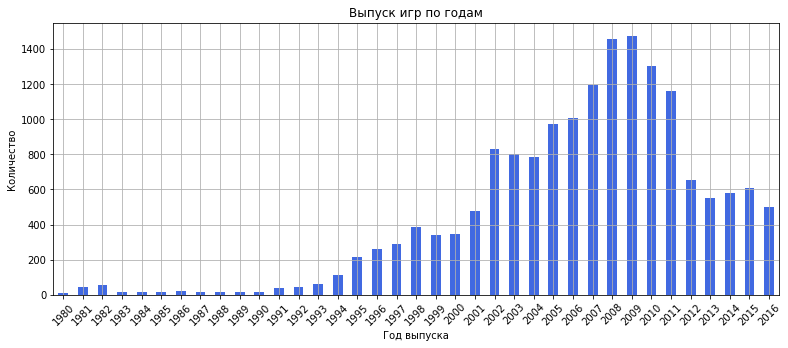

In [96]:
games_by_year['count'].plot(kind='bar', title='Выпуск игр по годам', xlim = (1980, 2016),
                                   color='royalblue', grid=True, figsize=(13, 5), rot = 45)
plt.xlabel("Год выпуска")
plt.ylabel('Количество')


Как видно из графика, до 2001 года выпускалось мало игр. Данные за эти годы для дальнейшего анализа использовать не будем.

In [97]:
# перезапишем таблицу games_data:
games_data = games_data.query('year_of_release > 2001')

#### Продажи по платформам.

In [98]:
# сводная таблица суммы продаж по каждой платформе по годам:
games_by_platform_year = games_data.pivot_table(index='platform', columns = 'year_of_release', values = 'sales',
                                                aggfunc = 'sum')

# сводная таблица суммы продаж по каждой платформе за все годы:
games_by_platform = games_data.pivot_table(index='platform', values = 'sales', aggfunc = 'sum')
games_by_platform.columns = ['sum_sales']
# объединение двух сводных таблиц в одну:
final_games_by_platform_year = games_by_platform_year.join(games_by_platform, how='outer')

In [99]:
# отсортируем полученную таблицу по столбцу 'sum_sales' в порядке убывания:
final_games_by_platform_year.sort_values('sum_sales', ascending=False)

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,sum_sales
platform,,,,,,,,,,,,,,,,
PS2,205.38,184.31,211.81,182.87,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,1050.17
X360,NaN,NaN,NaN,8.25,51.62,95.41,135.26,120.29,180.21,143.84,99.74,88.58,34.74,11.96,1.52,971.42
PS3,NaN,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,165.09,107.36,113.25,47.76,16.82,3.60,939.65
Wii,NaN,NaN,NaN,NaN,137.15,152.77,171.32,223.30,127.95,59.65,21.71,8.59,3.75,1.14,0.18,907.51
DS,NaN,NaN,17.27,130.14,119.81,146.94,148.65,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,806.10
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25,314.14
PSP,NaN,NaN,7.06,43.84,55.32,46.93,34.55,42.30,35.04,17.82,7.69,3.14,0.24,0.12,NaN,294.05
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,57.76,43.76,27.78,15.14,259.00
GBA,74.16,61.64,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.25


Как видно из таблицы, несмотря на высокие суммарные продажи для некоторых платформ, на данный момент игры не выпускаются. Например, продажи игр по всему миру для платформы PlayStation2 (PS2) составляют 1 050,17 млн. долларов, но с 2012 года продаж нет. Аналогичная ситуация и с платформами Nintendo DS (DS), Game Boy Advance (GBA), XBox (XB), GС, PlayStation (PS), Nintendo DC (DC), Nintendo 64 (N64). Исключим информацию по этим платформам для дальнейшего анализа.

In [100]:
# перезапишем таблицу games_data:
games_data = games_data.query('platform not in ("PS2", "DS", "GBA", "XB", "GC", "PS", "DC", "N64")')

In [101]:
# тогда сводная таблица суммы продаж по каждой платформе по годам и суммарно за все годы:
new_games_by_platform_year = games_data.pivot_table(index='platform', columns = 'year_of_release', values = 'sales',
                                                aggfunc = 'sum')
new_games_by_platform = games_data.pivot_table(index='platform', values = 'sales', aggfunc = 'sum')
new_games_by_platform.columns = ['sum_sales']
new_final_games_by_platform_year = new_games_by_platform_year.join(new_games_by_platform, how='outer')

In [102]:
# отсортируем полученную таблицу по столбцу 'sum_sales' в порядке убывания:
new_final_games_by_platform_year.sort_values('sum_sales', ascending=False)

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,sum_sales
platform,,,,,,,,,,,,,,,,
X360,NaN,NaN,NaN,8.25,51.62,95.41,135.26,120.29,180.21,143.84,99.74,88.58,34.74,11.96,1.52,971.42
PS3,NaN,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,165.09,107.36,113.25,47.76,16.82,3.60,939.65
Wii,NaN,NaN,NaN,NaN,137.15,152.77,171.32,223.30,127.95,59.65,21.71,8.59,3.75,1.14,0.18,907.51
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25,314.14
PSP,NaN,NaN,7.06,43.84,55.32,46.93,34.55,42.30,35.04,17.82,7.69,3.14,0.24,0.12,NaN,294.05
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,57.76,43.76,27.78,15.14,259.00
PC,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,28.04,35.03,23.22,12.38,13.28,8.52,5.25,199.35
XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.96,54.07,60.14,26.15,159.32
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.56,21.65,22.03,16.35,4.60,82.19


Рассмотрим продажи по годам для каждой платформы:

##### Xbox 360

Text(0, 0.5, 'Продажи, млн. долларов')

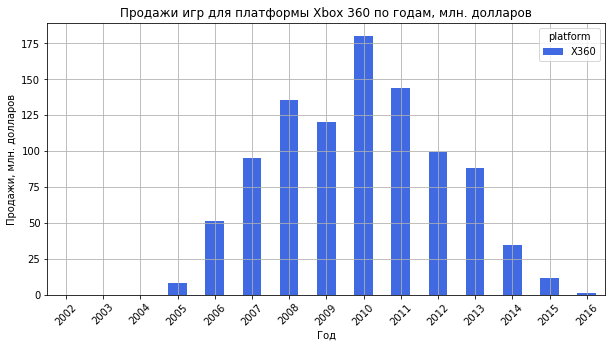

In [103]:
new_games_by_platform_year.query('platform == "X360"').transpose().plot(kind='bar',
                           color='royalblue', title='Продажи игр для платформы Xbox 360 по годам, млн. долларов',
                           xlim = (2002, 2016), grid=True, figsize=(10, 5), rot = 45)
plt.xlabel("Год")
plt.ylabel('Продажи, млн. долларов')


Пик продаж для платформы Xbox 360 приходится на 2010 год, а после него ежегодно идет значительное уменьшение суммы продаж и к 2016 году этот показатель составляет около 1,5 млн. долларов.

##### PlayStation 3

Text(0, 0.5, 'Продажи, млн. долларов')

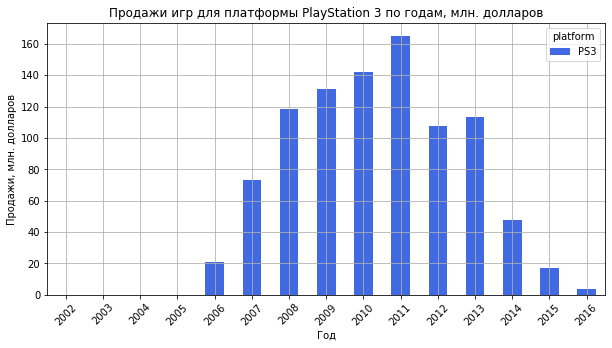

In [104]:
new_games_by_platform_year.query('platform == "PS3"').transpose().plot(kind='bar',
                                title='Продажи игр для платформы PlayStation 3 по годам, млн. долларов', xlim = (2002, 2016),
                                color='royalblue', grid=True, figsize=(10, 5), rot = 45)
plt.xlabel("Год")
plt.ylabel('Продажи, млн. долларов')


Пик продаж для платформы PlayStation 3 приходится на 2011 год, после которого идет резкое снижение продаж и к 2016 году глобальные продажи игр составляют около 3,5 млн. долларов.

##### Nintendo Wii

Text(0, 0.5, 'Продажи, млн. долларов')

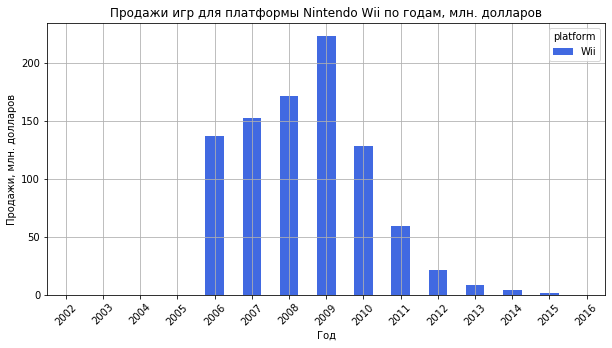

In [105]:
new_games_by_platform_year.query('platform == "Wii"').transpose().plot(kind='bar',
                                title='Продажи игр для платформы Nintendo Wii по годам, млн. долларов', xlim = (2002, 2016),
                                color='royalblue', grid=True, figsize=(10, 5), rot = 45)
plt.xlabel("Год")
plt.ylabel('Продажи, млн. долларов')


Пик продаж игр для платформы Nintendo Wii приходится на 2009 год, затем продажи резко падают и в 2016 году практически равны нулю.

##### PlayStation 4

Text(0, 0.5, 'Продажи, млн. долларов')

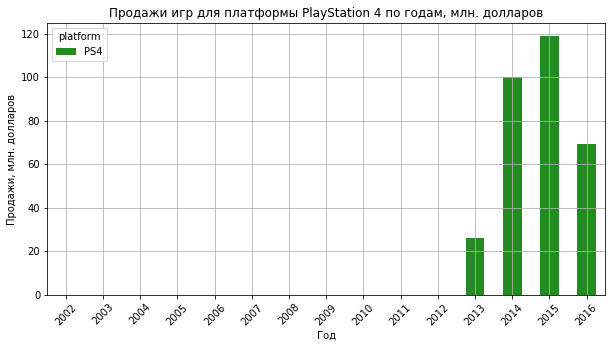

In [106]:
new_games_by_platform_year.query('platform == "PS4"').transpose().plot(kind='bar',
                                title='Продажи игр для платформы PlayStation 4 по годам, млн. долларов', xlim = (2002, 2016),
                                color='forestgreen', grid=True, figsize=(10, 5), rot = 45)
plt.xlabel("Год")
plt.ylabel("Продажи, млн. долларов")


Продажи игр для платформы PlayStation 4 начались в 2013 году, в 2016 году глобальные продажи составили около 70 млн. долларов. Эту платформу можно использовать для прогноза продаж на 2017 год.

##### PlayStation Portable 

Text(0, 0.5, 'Продажи, млн. долларов')

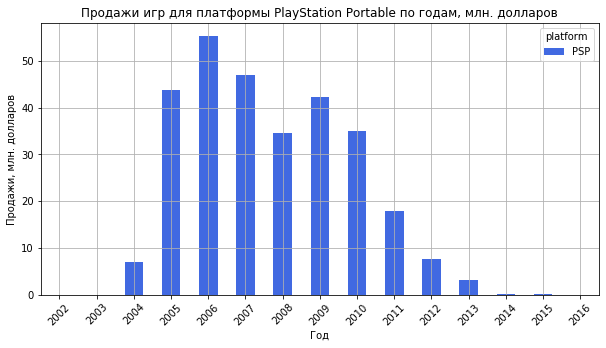

In [107]:
new_games_by_platform_year.query('platform == "PSP"').transpose().plot(kind='bar',
                                title='Продажи игр для платформы PlayStation Portable по годам, млн. долларов',
                                xlim = (2002, 2016), color='royalblue', grid=True, figsize=(10, 5), rot = 45)
plt.xlabel("Год")
plt.ylabel("Продажи, млн. долларов")


Пик продаж игр для платформы PlayStation Portable приходится на 2006 год, а затем продажи постепенно уменьшаются и практически сходят на нет.

##### Nintendo 3DS

Text(0, 0.5, 'Продажи, млн. долларов')

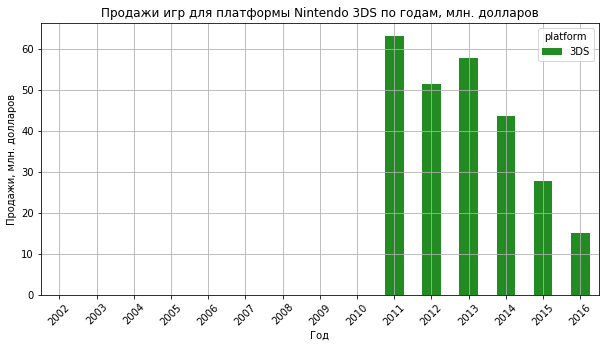

In [108]:
new_games_by_platform_year.query('platform == "3DS"').transpose().plot(kind='bar',
                                title='Продажи игр для платформы Nintendo 3DS по годам, млн. долларов',
                                xlim = (2002, 2016), color='forestgreen', grid=True, figsize=(10, 5), rot = 45)
plt.xlabel("Год")
plt.ylabel("Продажи, млн. долларов")


Продажи игр для платформы Nintendo 3DS начались в 2011 году, на него же приходится максимальная сумма продаж, в 2016 году глобальные продажи составили около 15 млн. долларов. Эту платформу можно использовать для прогноза продаж на 2017 год.

##### Personal Computer

Text(0, 0.5, 'Продажи, млн. долларов')

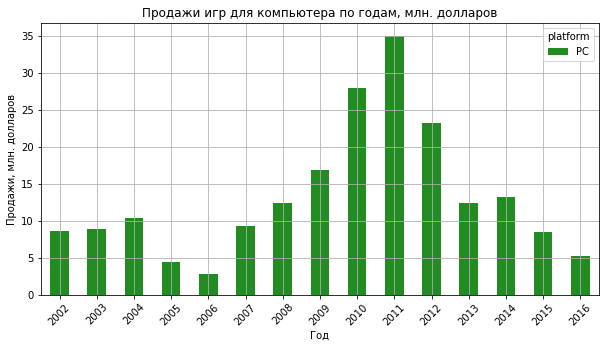

In [109]:
new_games_by_platform_year.query('platform == "PC"').transpose().plot(kind='bar',
                                title='Продажи игр для компьютера по годам, млн. долларов',
                                xlim = (2002, 2016), color='forestgreen', grid=True, figsize=(10, 5), rot = 45)
plt.xlabel("Год")
plt.ylabel("Продажи, млн. долларов")


Игры для компьютера всегда были популярны для пользователя. Пик продаж приходится на 2011 год. В 2016 году продажи составляют 5 млн. долларов. Эту платформу можно использовать для прогноза продаж на 2017 год.

##### Xbox One

Text(0, 0.5, 'Продажи, млн. долларов')

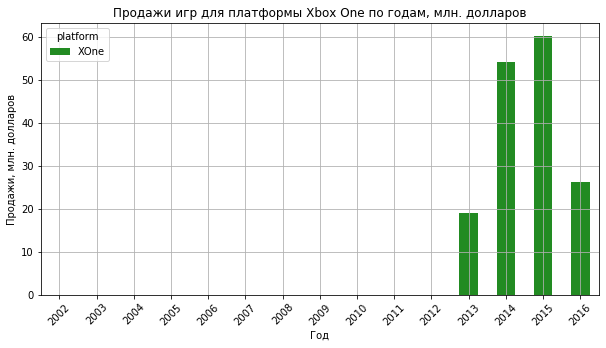

In [110]:
new_games_by_platform_year.query('platform == "XOne"').transpose().plot(kind='bar',
                                title='Продажи игр для платформы Xbox One по годам, млн. долларов',
                                xlim = (2002, 2016), color='forestgreen', grid=True, figsize=(10, 5), rot = 45)
plt.xlabel("Год")
plt.ylabel("Продажи, млн. долларов")


Продажи игр для платформы Xbox One начались в 2013 году, пик продаж приходится на 2015 год, в 2016 году глобальные продажи составили около 26 млн. долларов. Эту платформу можно использовать для прогноза продаж на 2017 год.

##### Wii U

Text(0, 0.5, 'Продажи, млн. долларов')

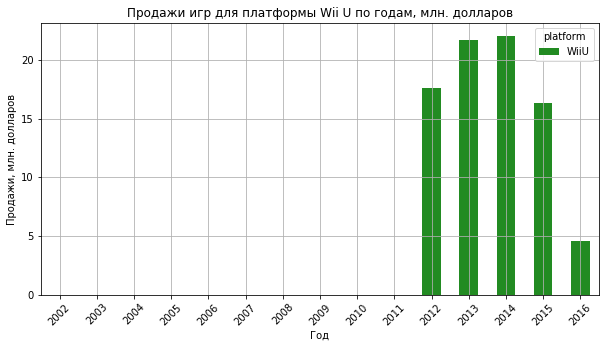

In [111]:
new_games_by_platform_year.query('platform == "WiiU"').transpose().plot(kind='bar',
                                title='Продажи игр для платформы Wii U по годам, млн. долларов',
                                xlim = (2002, 2016), color='forestgreen', grid=True, figsize=(10, 5), rot = 45)
plt.xlabel("Год")
plt.ylabel("Продажи, млн. долларов")


Продажи игр для платформы Wii U начались в 2012 году, пик продаж приходится на 2014 год, в 2016 году глобальные продажи составили около 5 млн. долларов. Эту платформу можно использовать для прогноза продаж на 2017 год.

##### PlayStation Vita

Text(0, 0.5, 'Продажи, млн. долларов')

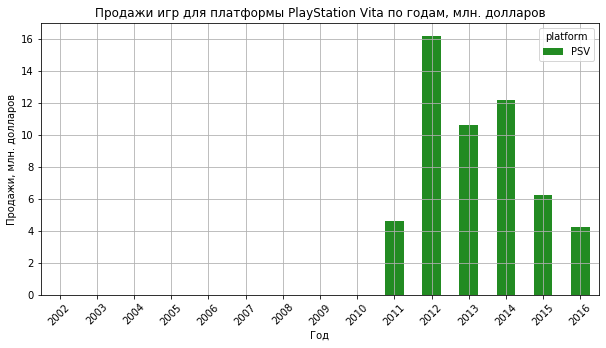

In [112]:
new_games_by_platform_year.query('platform == "PSV"').transpose().plot(kind='bar',
                                title='Продажи игр для платформы PlayStation Vita по годам, млн. долларов',
                                xlim = (2002, 2016), color='forestgreen', grid=True, figsize=(10, 5), rot = 45)
plt.xlabel("Год")
plt.ylabel("Продажи, млн. долларов")

Продажи игр для платформы PlayStation Vita начались в 2011 году, пик продаж приходится на 2012 год, в 2016 году глобальные продажи составили около 4 млн. долларов. Эту платформу можно использовать для прогноза продаж на 2017 год.

Итак, для дальнейшего анализа возьмем наиболее популярные в последние годы игровые платформы: 
 - PlayStatoion 4 (c 2013 года);
 - Nintendo 3DS (с 2011 года);
 - компьютер (популярен всегда);
 - Xbox One (с 2013 года);
 - Wii U (с 2012 года);
 - PlayStation Vita (с 2011 года).

In [113]:
# перезапишем таблицу games_data:
games_data = games_data.query('platform in ("PS4", "3DS", "PC", "XOne", "WiiU", "PSV") and year_of_release > 2010')
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011,racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16702,STORM: Frontline Nation,PC,2011,strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01
16703,Strawberry Nauts,PSV,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Построим диаграмму размаха по глобальным продажам каждой игры:

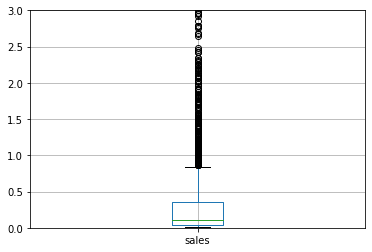

In [114]:
plt.ylim(0, 3)
games_data.boxplot(column='sales', figsize = (8, 15))
plt.show()

In [115]:
games_data['sales'].describe()

count    2125.000000
mean        0.454776
std         1.136424
min         0.010000
25%         0.040000
50%         0.110000
75%         0.360000
max        14.630000
Name: sales, dtype: float64

In [116]:
print(games_data['sales'].describe()[6]+1.5 * (games_data['sales'].describe()[6] - games_data['sales'].describe()[4]))
    

0.8400000000000001


Средние глобальные продажи игр равны 0,11 млн. долларов. Но, как видно, из диаграммы размаха в продажах очень много выбросов. Для последующего прогноза продаж игр на 2017 год, не будем учитывать игры продажи которых лежат выше границы нормального размаха, которая равна 0,84 млн. долларов

In [117]:
games_data.pivot_table(index='platform', values = 'sales', aggfunc = 'sum').describe()

,sales
count,6.000000
mean,161.066667
std,104.606997
min,54.070000
25%,86.062500
50%,128.500000
75%,234.080000
max,314.140000


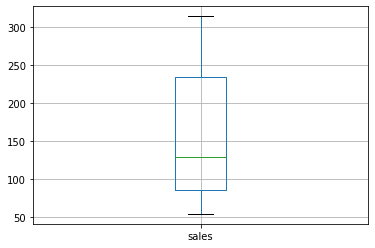

In [118]:
games_data.pivot_table(index='platform', values = 'sales', aggfunc = 'sum').boxplot(column='sales')
plt.show()

Глобальные продажи игр по платформам находятся в пределах нормального размаха.

#### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

Рассмотрим как влияют отзывы критиков на продажи по платформам:

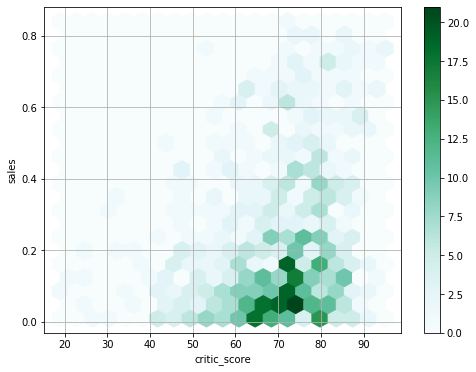

In [119]:
games_data.query('sales <= 0.84').plot(x='critic_score', y='sales', kind='hexbin',
                                       gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [120]:
games_data.query('sales <= 0.84')['sales'].corr(games_data.query('sales <= 0.84')['critic_score'])

0.25100146374542703

Рассмотрим как влияют отзывы пользователей на продажи по платформам:

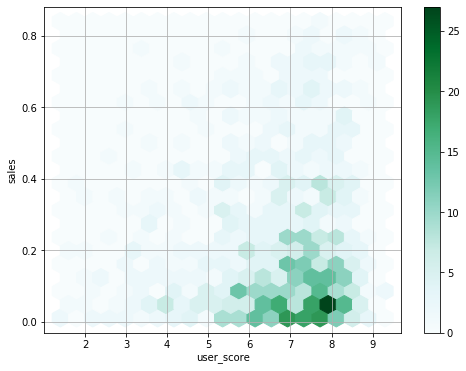

In [121]:
games_data.query('sales <= 0.84').plot(x='user_score', y='sales', kind='hexbin',
                                       gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [122]:
games_data.query('sales <= 0.84')['user_score'].corr(games_data.query('sales <= 0.84')['sales'])

0.05070166482955804

Коэффициент корреляции между продажами и отзывами пользователей 0,05 - зависимости практически нет, т.е. отзывы пользователей не влияют на сумму продаж.

#### Продажи по жанрам.

In [123]:
games_by_genre = games_data.query('sales <= 0.84').pivot_table(
    index='genre', values=['name', 'sales'], 
                    aggfunc={'name': ['count'], 
                             'sales': ['sum']})
games_by_genre.columns = ['count', 'sales']
games_by_genre

,count,sales
genre,,
action,652,105.43
adventure,201,14.82
fighting,53,7.80
misc,138,24.70
platform,58,10.89
puzzle,38,4.66
racing,81,12.93
role-playing,244,44.95
shooter,112,28.60


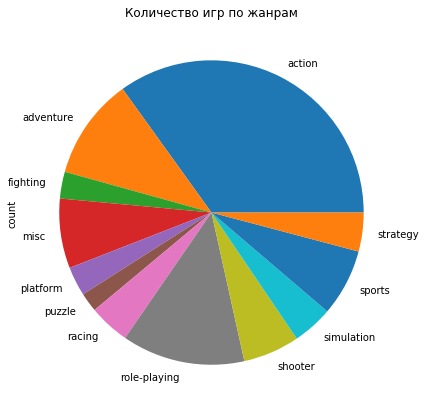

In [124]:
games_by_genre['count'].plot(kind='pie', title='Количество игр по жанрам', figsize=(15, 7))

Около трети всех игр выпускается жанра "action", жанры "role-playing", "adventure", "sports" тоже популярны среди поставщиков игр. Наименее популярные жанры - "puzzle", "platform", "fighting".

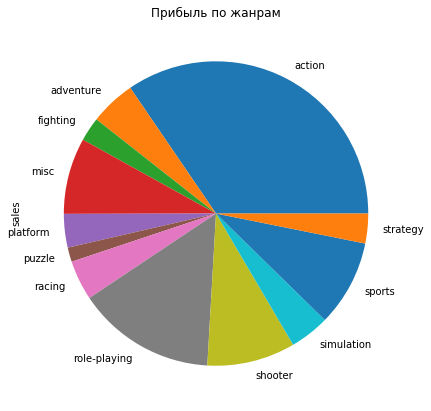

In [125]:
games_by_genre['sales'].plot(kind='pie', title='Прибыль по жанрам', figsize=(15, 7))

Наиболее прибыльными жанрами являются "action", "role-playing" и "shooter", наименее - "puzzle", "platform" и "fighting". Посмотрим на зависимость суммарных продаж от количества выпускаемых игр:

In [126]:
games_by_genre['sales'].corr(games_by_genre['count'])

0.9691924873508726

Коэффициент корреляции между количеством выпускаемых игр по жанрам и суммарными продажами по жанрам - 0,97 - сильная прямопропорциональная зависимость. То есть чем больше выпускается игр, тем больше продажи.

### Шаг 4. Портрет пользователя в Северной Америке (NA), Европе (EU), Японии (JP). 

Определим популярные платформы для каждого из регионов:

In [127]:
games_by_platform_region = games_data.query('sales <= 0.84').pivot_table(
    index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
games_by_platform_region

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.08,32.86,25.21
PC,32.84,0.00,15.37
PS4,23.91,8.06,18.45
PSV,9.62,20.34,9.59
WiiU,10.15,3.21,14.26
XOne,13.75,0.07,23.42


Определим популярные жанры для каждого из регионов:

In [128]:
games_by_genre_region = games_data.query('sales <= 0.84').pivot_table(
    index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], 
                    aggfunc='sum')
games_by_genre_region

,eu_sales,jp_sales,na_sales
genre,,,
action,37.04,21.17,37.24
adventure,4.68,4.93,3.85
fighting,2.16,1.81,3.03
misc,5.92,7.57,9.44
platform,4.36,0.53,4.84
puzzle,1.65,1.52,1.18
racing,6.79,0.42,4.29
role-playing,9.45,19.24,13.02
shooter,13.03,0.39,11.94


Определим влияние рейтинга ESRB на продажи в каждом из регионов:

In [129]:
games_by_rating_region = games_data.query('sales <= 0.84').pivot_table(
    index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], 
                    aggfunc='sum')
games_by_rating_region

,eu_sales,jp_sales,na_sales
rating,,,
E,17.82,3.69,15.95
E10+,21.25,3.23,26.17
M,23.25,3.56,21.43
RP,0.03,0.00,0.00
T,17.99,10.83,19.11


##### Портрет пользователя в Северной Америке:

Text(0, 0.5, 'Продажи, млн. долларов')

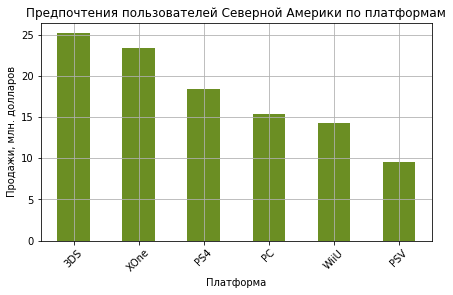

In [130]:
games_by_platform_region['na_sales'].sort_values(ascending=False).plot(kind='bar',
                                title='Предпочтения пользователей Северной Америки по платформам',
                                color='olivedrab', grid=True, figsize=(7, 4), rot = 45)
plt.xlabel("Платформа")
plt.ylabel("Продажи, млн. долларов")

Text(0, 0.5, 'Продажи, млн. долларов')

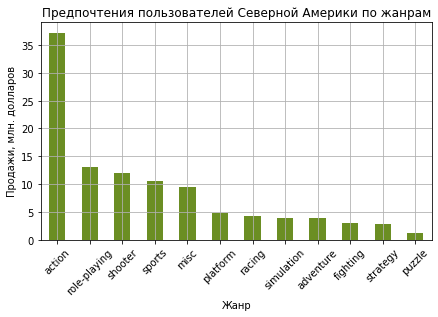

In [131]:
games_by_genre_region['na_sales'].sort_values(ascending=False).plot(kind='bar',
                                title='Предпочтения пользователей Северной Америки по жанрам',
                                color='olivedrab', grid=True, figsize=(7, 4), rot = 45)
plt.xlabel("Жанр")
plt.ylabel("Продажи, млн. долларов")

Text(0, 0.5, 'Продажи, млн. долларов')

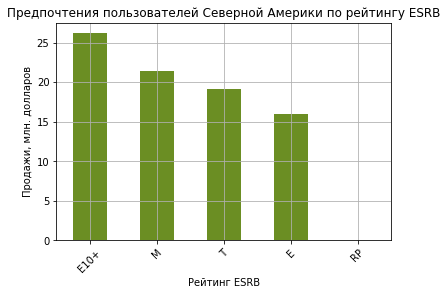

In [132]:
games_by_rating_region['na_sales'].sort_values(ascending=False).plot(kind='bar',
                                title='Предпочтения пользователей Северной Америки по рейтингу ESRB',
                                color='olivedrab', grid=True, rot = 45)
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Продажи, млн. долларов")

Пользователь из Северной Америки предпочитает игры жанра "action" в возрастной категории ESRB "Для всех от 10 лет и старше" для платформы Nintendo 3DS. Наименее предпочтительны для этого региона игры жанра "puzzle" в возрастной категории ESRB "Для всех" для платформы PlayStation Vita.

##### Портрет пользователя в Европе:

Text(0, 0.5, 'Продажи, млн. долларов')

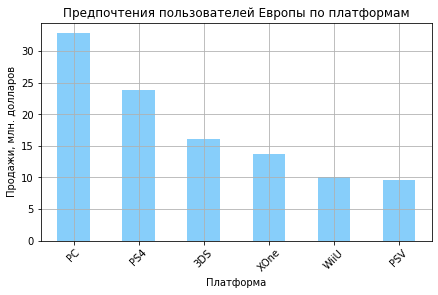

In [133]:
games_by_platform_region['eu_sales'].sort_values(ascending=False).plot(kind='bar',
                                title='Предпочтения пользователей Европы по платформам',
                                color='lightskyblue', grid=True, figsize=(7, 4), rot = 45)
plt.xlabel("Платформа")
plt.ylabel("Продажи, млн. долларов")

Text(0, 0.5, 'Продажи, млн. долларов')

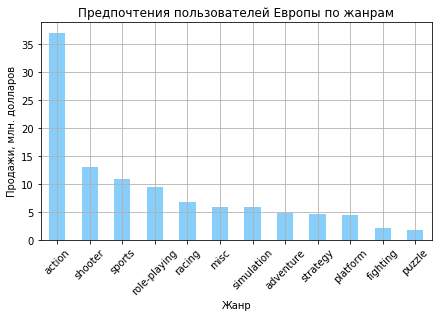

In [134]:
games_by_genre_region['eu_sales'].sort_values(ascending=False).plot(kind='bar',
                                title='Предпочтения пользователей Европы по жанрам',
                                color='lightskyblue', grid=True, figsize=(7, 4), rot = 45)
plt.xlabel("Жанр")
plt.ylabel("Продажи, млн. долларов")

Text(0, 0.5, 'Продажи, млн. долларов')

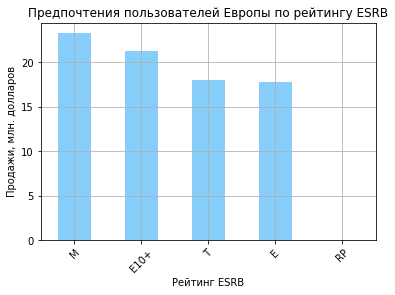

In [135]:
games_by_rating_region['eu_sales'].sort_values(ascending=False).plot(kind='bar',
                                title='Предпочтения пользователей Европы по рейтингу ESRB',
                                color='lightskyblue', grid=True, rot = 45)
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Продажи, млн. долларов")

Пользователь из Европы предпочитает игры жанра "action" в возрастной категории ESRB "Для взрослых" для персонального компьютера. Наименее предпочтительны для этого региона игры жанра "puzzle" в возрастной категории ESRB "Для всех" для платформы PlayStation Vita.

##### Портрет пользователя в Японии:

Text(0, 0.5, 'Продажи, млн. долларов')

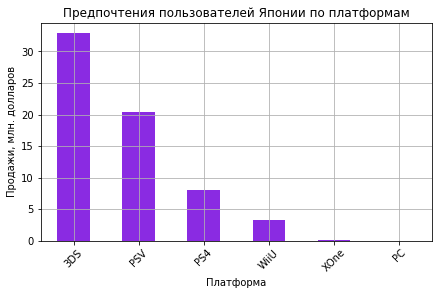

In [136]:
games_by_platform_region['jp_sales'].sort_values(ascending=False).plot(kind='bar',
                                title='Предпочтения пользователей Японии по платформам',
                                color='blueviolet', grid=True, figsize=(7, 4), rot = 45)
plt.xlabel("Платформа")
plt.ylabel("Продажи, млн. долларов")

Text(0, 0.5, 'Продажи, млн. долларов')

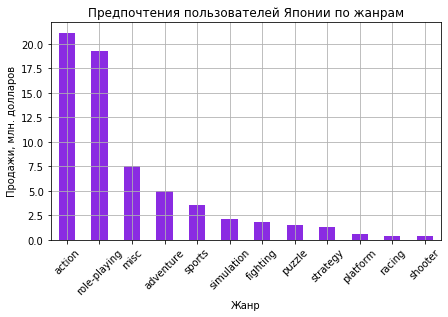

In [137]:
games_by_genre_region['jp_sales'].sort_values(ascending=False).plot(kind='bar',
                                title='Предпочтения пользователей Японии по жанрам',
                                color='blueviolet', grid=True, figsize=(7, 4), rot = 45)
plt.xlabel("Жанр")
plt.ylabel("Продажи, млн. долларов")

Text(0, 0.5, 'Продажи, млн. долларов')

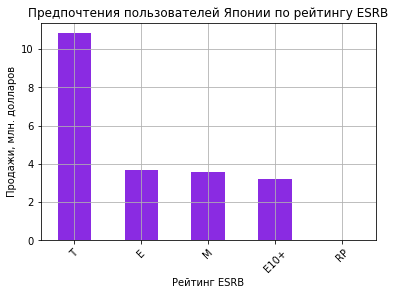

In [138]:
games_by_rating_region['jp_sales'].sort_values(ascending=False).plot(kind='bar',
                                title='Предпочтения пользователей Японии по рейтингу ESRB',
                                color='blueviolet', grid=True, rot = 45)
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Продажи, млн. долларов")

Пользователь из Японии предпочитает игры жанров "action" и "role-playing" в возрастной категории ESRB "Подросткам" для платформы Nintendo 3DS. Наименее предпочтительны для этого региона игры жанра "shooter" в возрастной категории ESRB "Для всех от 10 лет и старше" для персонального компьютера.

### Шаг 5. Проверка гипотез. 

##### - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза:
 H0  — средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC;

альтернативная гипотеза:
 H1 — средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC.

Уровень значимости возьмем 0.05, если p-value окажется меньше него - отвергнем нулевую гипотезу.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяется метод scipy.stats.ttest_ind:

In [139]:
alpha = 0.05
results = st.ttest_ind(
    games_data.query('sales <= 0.84 and platform == "XOne"')['user_score'], 
    games_data.query('sales <= 0.84 and platform == "PC"')['user_score'], equal_var = True, nan_policy="omit")

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.7076219318396646
Не получилось отвергнуть нулевую гипотезу


Результаты ttest'а не позволяют отвергнуть нулевую гипотезу, то есть с вероятностью 71% можно говорить о том, что средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.

##### - cредние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные

Нулевая гипотеза:
 H0  — средний пользовательский рейтинг жанра Action (англ. «действие») равен среднему пользовательскому жанра Sports (англ. «виды спорта»);

альтернативная гипотеза:
 H1 — средний пользовательский рейтинг жанра Action (англ. «действие») не равен среднему пользовательскому жанра Sports (англ. «виды спорта»).

Уровень значимости возьмем 0.05, если p-value окажется меньше него - отвергнем нулевую гипотезу.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяется метод scipy.stats.ttest_ind:

In [140]:
alpha = 0.05
results = st.ttest_ind(
    games_data.query('sales <= 0.84 and genre == "action"')['user_score'], 
    games_data.query('sales <= 0.84 and genre == "sports"')['user_score'], equal_var = True, nan_policy="omit")

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.776892227547904e-11
Отвергаем нулевую гипотезу


In [152]:
interested_value = 320
    
alpha = 0.01 # критический уровень статистической значимости
    
results = st.ttest_1samp(
    after, 
    interested_value)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.1691259760233442
Не получилось отвергнуть нулевую гипотезу


### Шаг 6. Общий вывод

По результатам проведенного анализа, можно сделать вывод, что при планировании рекламных компаний необходимо учесть в каком регионе будет транслироваться реклама. Так, для пользователей Северной Америки, потенциально популярный продукт это игры жанра "action" в возрастной категории ESRB "Для всех от 10 лет и старше" для платформы Nintendo 3DS. Наименее предпочтительны для этого региона игры жанра "puzzle" в возрастной категории ESRB "Для всех" для платформы PlayStation Vita.
Пользователи из Европы предпочитают игры жанра "action" в возрастной категории ESRB "Для взрослых" для персонального компьютера. Наименее предпочтительны для этого региона игры жанра "puzzle" в возрастной категории ESRB "Для всех" для платформы PlayStation Vita. Для пользователей из Японии предпочтительнее игры жанров "action" и "role-playing" в возрастной категории ESRB "Подросткам" для платформы Nintendo 3DS. Наименее предпочтительны для этого региона игры жанра "shooter" в возрастной категории ESRB "Для всех от 10 лет и старше" для персонального компьютера.